# Clustering mit dichtebasierten Verfahren (DBSCAN und OPTICS)

------------------
### Aufgabe 1: Bestimmung von Kerndistanz und Erreichbarkeitsdistanz (4 Punkte)

Gegeben sei der unten stehende Datensatz, sowie $MinPts = 4$ (zur Erinnerung: der Punkt selbst zählt mit) und $\varepsilon = 2$. 

1. Bestimmen Sie für die Objekte D, E, A jeweils die Kerndistanz. 
2. Bestimmen Sie außerdem für die 3 Punkte aus Teilaufgabe 1 alle möglichen Erreichbarkeitsdistanzen, d.h. die Erreichbarkeitsdistanz von E relativ zu D, von A relativ zu D, von D relativ zu E, von A relativ zu E, von D relativ zu A, sowie von E relativ zu A. <br>

Verwenden Sie hierfür die **Euklidische Distanz.**

<img src = "./img/Datensatz.jpg" width = 200>



### 1) Kerndistanzen:
Kerndist(**D**) = MinSamples - Distanz(D) = 4 - sqrt(2) = 2,585786438<br>
Kerndist(**E**) = MinSamples - Distanz(E) = 4 - 2 = 2<br>
Kerndist(**A**) = 2 < 4 = UNDEFINIERT<br>
<br>
### 2)
ErrDist(**A, D**) = 3<br>
ErrDist(**D, A**) = UNDEFINIERT<br>
ErrDist(**A, E**) = 4  <br>
ErrDist(**E, A**) = UNDEFINIERT<br>
ErrDist(**E, D**) = 2,585786438 -> Kerndistanz von D<br>
ErrDist(**D, E**) = 2 -> Kerndistanz von E

--------------------
### Aufgabe 2: Anwendung von DBSCAN (2 Punkte)

Wenden Sie DBSCAN auf den Datensatz "Hierarchical Clusters.txt" an. Stellen Sie die Parameter so ein, dass  <br>
a) die 6 kleinen Cluster gefunden werden  <br>
b) die 3 großen Cluster, die die 6 kleinen enthalten gefunden werden. <br>
Die restlichen Punkte sollen jeweils als Rauschen betrachtet werden. 

Die folgenden Screenshots zeigen Ihnen das gewünschte Ergebnis: 

<img src="./img/6Cluster.jpg" width = 200> <img src="./img/3Cluster.jpg" width=210>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, OPTICS

#### Data Loading and Normalizing

In [2]:
data = pd.read_csv('./data/Hierarchical Clusters.txt', sep=",", header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       359 non-null    float64
 1   1       359 non-null    float64
dtypes: float64(2)
memory usage: 5.7 KB


In [3]:
scaler = MinMaxScaler()
data[0] = scaler.fit_transform(data[0].to_numpy().reshape(-1, 1))
data[1] = scaler.fit_transform(data[1].to_numpy().reshape(-1, 1))

In [4]:
print(f"Min: {data[0].min()}, Max: {data[0].max()}")
print(f"Min: {data[1].min()}, Max: {data[1].max()}")

Min: 0.0, Max: 1.0
Min: 0.0, Max: 1.0


#### Model clustering

In [5]:
model = DBSCAN(eps=0.03, min_samples=7).fit(data)

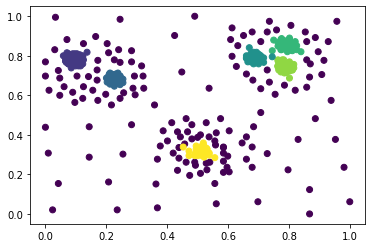

In [6]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(data[0], data[1], c=model.labels_)

In [7]:
model = DBSCAN(eps=0.09, min_samples=5).fit(data)

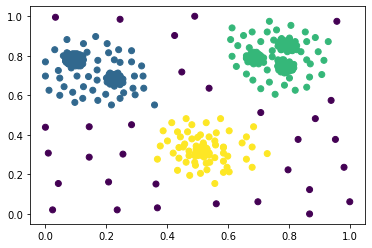

In [8]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(data[0], data[1], c=model.labels_)

-------------------------
### Aufgabe 3: Reachability Plot (9 Punkte)
Ein großer Vorteil von OPTICS ist, dass mit dem Erreichbarkeitsdiagramm (Reachability Plot) eine Möglichkeit besteht, die gefundenen Cluster-Strukturen zu visualisieren. Implementieren Sie eine Funktion, mit der sich ein Erreichbarkeitsdiagramm erzeugen lässt. Bitte verwenden Sie ein Balkendiagramm als Visualisierungsmethode wie in der Vorlesung gezeigt. Es reicht, wenn im Diagramm die Erreichbarkeitsdistanzen dargestellt werden (ohne Kerndistanzen). 

Tipps: 
* Machen Sie sich zunächst erneut bewusst, wie ein Erreichbarkeitsdiagramm aufgebaut ist. 
* Erstellen Sie anschließend eine Liste, aus der hervorgeht, welche Schritte nacheinander von Ihnen durchgeführt werden müssen, um das Diagramm zu erzeugen. 
* Basierend auf dieser Liste können Sie dann die für die Implementierung der einzelnen Teilschritte nötigen Informationen recherchieren (z.B. finden Sie in der Dokumentation von OPTICS Informationen darüber, welche Attribute Ihnen die Erreichbarkeitsdistanzen liefern und wie Sie diese nach der Clustering-Ordnung sortieren können)
* Hinweis: Die Erreichbarkeitsdistanz kann auch auf unendlich gesetzt sein. Dieser Wert kann natürlich nicht geplottet werden. Für die Auswertung des Erreichbarkeits-Diagramms reicht es aber, wenn ersichtlich ist, dass der Wert "sehr hoch" ist. Führen Sie eine entsprechende Vorverarbeitung durch (beispielsweise indem Sie "unendlich" auf einen Wert setzen, der etwas höher als der Maximalwert der übrigen Erreichbarkeitsdistanzen ist)

Optionale Erweiterung: Erweitern Sie den Code so, dass im Erreichbarkeitsdiagramm die Balken nach ihrer Cluster-Zugehörigkeit eingefärbt werden

#### Eigene Schritt-für-Schritt-Anleitung

1. Daten laden und normalisieren
2. OPTICS clustern lassen
3. Kerndistanzen und Erreichbarkeitsdistanzen entnehmen
4. Zufälligen Punkt wählen und zu Punkt gehen, welcher die kleinste Erreichbarkeitsdistanz zu diesem besitzt
    -> So bis kein Punkt mehr in Liste

#### Ihre Implementierung

In [9]:
data = pd.read_csv('./data/Hierarchical Clusters.txt', sep=",", header=None)
scaler = MinMaxScaler()
data[0] = scaler.fit_transform(data[0].to_numpy().reshape(-1, 1))
data[1] = scaler.fit_transform(data[1].to_numpy().reshape(-1, 1))
model = OPTICS(min_samples=5).fit(data)

In [10]:
#plot_array = np.hstack((model.reachability_.reshape(-1, 1), model.core_distances_.reshape(-1, 1), model.ordering_.reshape(-1, 1)))

In [11]:
reachability_arr = np.clip(model.reachability_, 0, 1)

<BarContainer object of 359 artists>

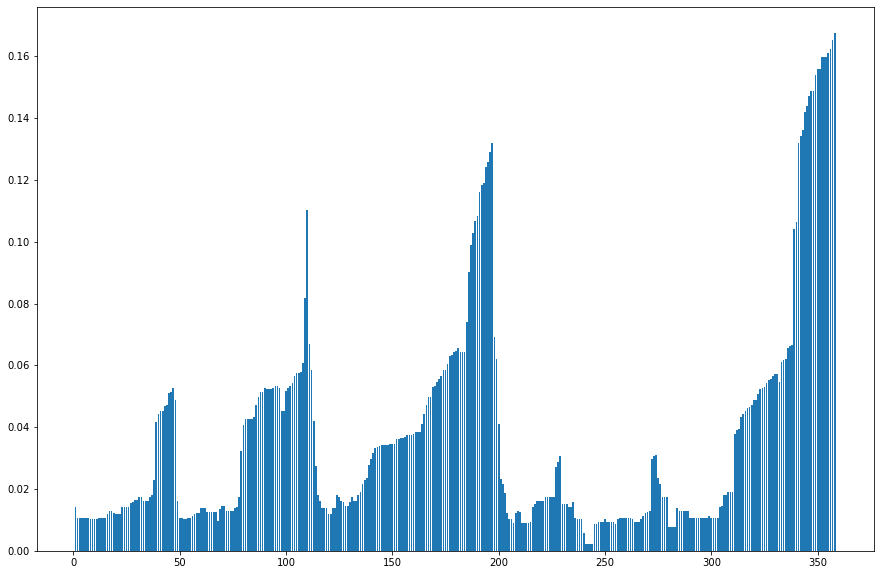

In [12]:
fig = plt.figure()
ax = plt.axes()

fig.set_size_inches(15, 10)

order = model.reachability_[model.ordering_]

ax.bar(np.arange(0, order.shape[0]), order)

--------------------------
### Aufgabe 4: Anwendung von OPTICS (3 Punkte)

Wiederholen sie Aufgabe 2 unter Verwendung von OPTICS. Verwenden Sie dabei ``cluster_method="dbscan"`` als Parameter.
Lesen Sie die richtigen Werte für ``eps`` aus dem in Aufgabe 3 erstellten Erreichbarkeitsdiagramm ab, um einmal die 3 großen Cluster und einmal die 6 kleinen Cluster zu extrahieren. 


### Daten laden und normalisieren

In [13]:
data = pd.read_csv('./data/Hierarchical Clusters.txt', sep=",", header=None)
scaler = MinMaxScaler()
data[0] = scaler.fit_transform(data[0].to_numpy().reshape(-1, 1))
data[1] = scaler.fit_transform(data[1].to_numpy().reshape(-1, 1))

### Model trainieren mit Werten vom Erreichbarkeitsplot

In [14]:
model_1 = OPTICS(eps=0.02, cluster_method="dbscan").fit(data)
model_2 = OPTICS(eps=0.058, cluster_method="dbscan").fit(data)

### Ergebnis Visualisieren

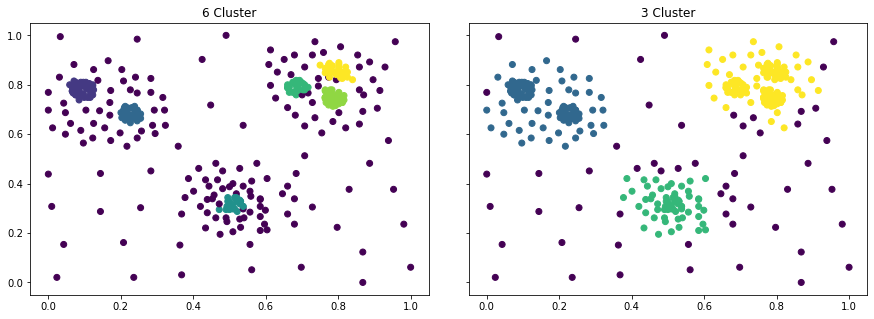

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax[0].scatter(data[0], data[1], c=model_1.labels_)
ax[0].set_title("6 Cluster")

ax[1].scatter(data[0], data[1], c=model_2.labels_)
ax[1].set_title("3 Cluster")

plt.subplots_adjust(wspace=0.1)

----------------------------------
### Aufgabe 5: Vergleich mit Dendrogramm (2 Punkte)

Unten sehen Sie ein mit Average Linkage erzeugtes Dendrogramm des Datensatzes. 
Vergleichen Sie das Dendrogramm mit Ihrem in Aufgabe 3 erzeugten Erreichbarkeitsdiagramm. In welchem der beiden Diagramme fällt es Ihnen leichter, die Clusterstruktur zu erkennen? (Begründen Sie kurz Ihre Entscheidung)

Hinweis: Es gibt hier kein absolutes richtig oder falsch, sondern nur gute oder schlechte Begründungen. Außerdem gilt Ihre hier getroffene Entscheidung möglicherweise nicht pauschal für alle Datensätze und Linkage-Verfahren.

<img src="./img/AverageLinkage.jpg">

An sich kann in beiden Diagrammen kann man die Cluster herauslesen. Mir fällt es im Erreichbarkeitsdiagramm jedoch leichter. 
<br>
Zum Einen, da das Dendrogramm bei vielen Punkten unübersichtlich wird, durch die vielen Linien und so existieren viele störende Elemente, welche das Ablesen der Cluster schwierieger macht.<br>
Im Erreichbarkeits ist jedes Objekt nur eine Linie ohne eine Verbindung zu den Anderen und somit unkomplizierter zu Verstehen (mit weniger Störungen).<br>
<br>
Zum Anderen sind durch die vielen Linien und Verbindungen im Dendrogramm Details, wie die kleinen Cluster schwer zu interpretieren/verstehen und man könnte leicht auch eine andere Anzahl von Cluster vermuten. Dieser Effekt tritt ebenfalls bei mehreren Datenpunkten auf (wie auch schon hier).<br>
<br>
Als letzten Punkt würde ich noch die Ausreißer, welche wahrscheinlich Rauschen sind, benennen. Diese sind im Erreichbarkeitsdiagramm ebenfalls besser zu Erkennen. Auch wenn es hier auch ein Argument für das Dendrogramm gibt, da im Erreichbarkeitsdiagramm nicht alle Punkte Rauschen sind. So ist besitzt der erste Punkt eines Cluster meistens eine hohe Erreichbarkeitsdistanz, was das interpretieren (ein ganz kleines bisschen) erschwert.

----------------------------
### Aufgabe 6: Zuordnung und Interpretation (optional)

Wo finden sich die einzelnen Cluster im Erreichbarkeitsdiagramm? Schaffen Sie eine Zuordnung zwischen den 3 großen Clustern des Scatterplots und dem in Aufgabe 4 erzeugten Erreichbarkeitsdiagramm für den Datensatz "Hierarchical Clusters.txt"

Hier ein Beispiel aus der Vorlesung: 

<img src = ".\img\BeispielZuordnung.jpg" width = 400>



In [16]:
data = pd.read_csv('./data/Hierarchical Clusters.txt', sep=",", header=None)
scaler = MinMaxScaler()
data[0] = scaler.fit_transform(data[0].to_numpy().reshape(-1, 1))
data[1] = scaler.fit_transform(data[1].to_numpy().reshape(-1, 1))
model = OPTICS(min_samples=5).fit(data)

Text(0.5, 1.0, 'Erreichbarkeitsdiagramm')

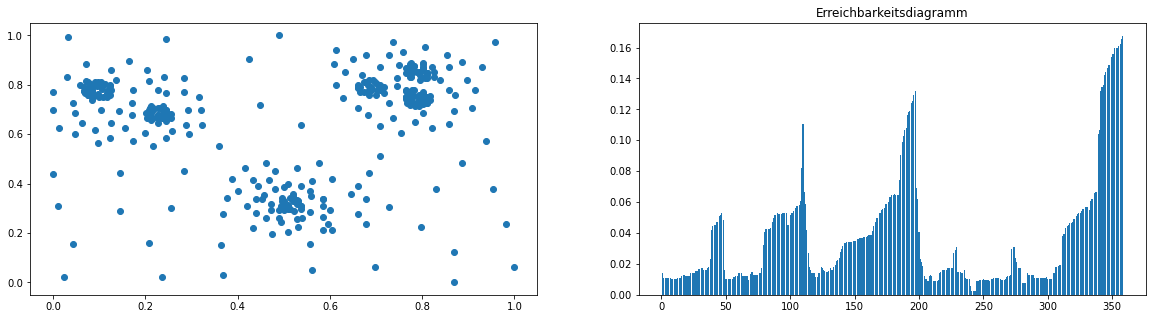

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].scatter(data[0], data[1])
ax[1].set_title("Scatterplot")

order = model.reachability_[model.ordering_]
ax[1].bar(np.arange(0, order.shape[0]), order)
ax[1].set_title("Erreichbarkeitsdiagramm")

Die beiden dichteren/kleineren Cluster links oben, finden sich links im Erreichbarkeitsdiagramm. Es befindet sich auch im Scatterplot einige Punkte mit höherer Erreichbarkeitsdistanz zwischen ihnen, sowie auch ganz links im Erreichbarkeitsdiagramm.<br>
Insgesamt befindet sich ganz links (natürlich) das linke größerere Cluster im Scatterplot.<br>
<br>
Der mittlere Cluster im Scatterplot ist auch im Erreichbarkeitsdiagramm in der Mitte, da es dort nur einen dichten Cluster gibt und die restlichen Punkte des Clusters unterschiedliche Dichten besitzen. Was man auch gut im Erreichbarkeitsdiagramm erkennen kann.<br>
<br>
Der rechte Cluster im Scatterplot entspricht auch dem rechten Cluster im Erreichbarkeitsdiagramm, was man vor allem an den 3 Unterclustern bemerken kann.<br>
<br>
Ganz rechts im Erreichbarkeitsdiagramm ist dann noch Rauschen zu sehen. owie auch bei den anderen Spitzen bei den anderen beiden Clustern am Ende.